In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 26

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

t-test that mean of hS100A9 differs from hS100A9/F37L. p: 0.4581
t-test that mean of hS100A9/F37L/M63F differs from hS100A9/F37L. p: 0.7659
t-test that mean of hS100A9/M63F differs from hS100A9/F37L. p: 0.0006


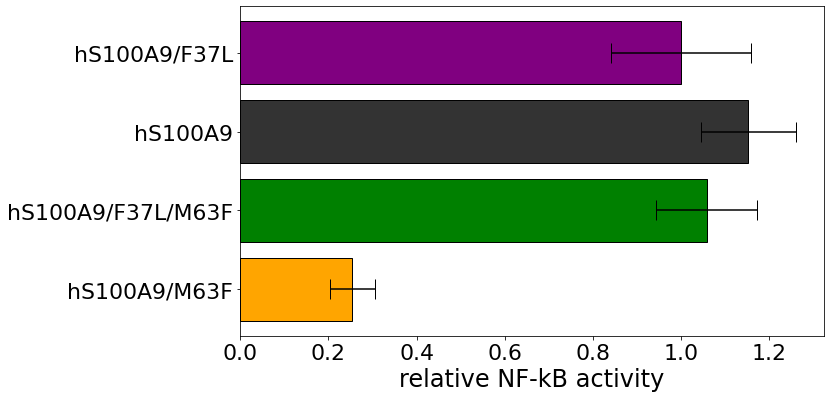

In [2]:
# Read raw data
df = pd.read_csv("activation-data.csv")

# Calculate means and standard errors
out_dict = {}
for s in np.unique(df["sample"]):
    
    this_df = df.loc[df["sample"] == s,:]
    v = np.mean(np.array(this_df.loc[:,["well1","well2","well3"]]),axis=1)
    
    mu = np.mean(v)
    sigma = np.std(v)/(np.sqrt(len(v)-1))

    out_dict[s] = (mu,sigma,v)

# Create barplot    
order = ["hS100A9/F37L","hS100A9","hS100A9/F37L/M63F","hS100A9/M63F"]
colors = ["purple","0.2","green","orange"]

m_vector = [out_dict[o][0]/out_dict[order[0]][0] for o in order]
s_vector = [out_dict[o][1]/out_dict[order[0]][0] for o in order]

fig, ax = plt.subplots(1,figsize=(12,6))

ax.barh(order,m_vector,color=colors,xerr=s_vector,capsize=10,edgecolor="black")
ax.invert_yaxis()  
ax.set_xlabel("relative NF-kB activity")

fig.tight_layout()
fig.savefig("figure_5e.pdf")

# Do t-tests relative to hS100A9/F37L
for o in order[1:]:
    p = scipy.stats.ttest_ind(out_dict[o][2],out_dict[order[0]][2]).pvalue
    print(f"t-test that mean of {o} differs from {order[0]}. p: {p:.4f}")
    